# Natural Language Processing with Python.

## Gathering the data with BeautifulSoup.

In [1]:
# importing libraries.

import requests                # an HTTP library for Python.
from bs4 import BeautifulSoup  # a webscrapping library.
import pickle                  # a library for data stream format.

In [2]:
# defining a function to get the data from the URLs.

def urlToTranscript(url):
    '''Return transcript data from the web.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, 'lxml')
    text = [p.text for p in soup.find(class_ = 'post-content').find_all('p')]
    print(url)
    return text

In [3]:
# URLs of transcripts.

urls = ['http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/',
        'http://scrapsfromtheloft.com/2017/08/07/bo-burnham-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-2016-full-transcript/']


In [4]:
# comedians names.

comedians = ['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe']



In [5]:
# requesting transcripts.

transcripts = [urlToTranscript(u) for u in urls]

http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/
http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/
http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/
http://scrapsfromtheloft.com/2017/08/07/bo-burnham-2013-full-transcript/
http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/
http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/
http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/
http://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/
http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/
http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/
http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/
http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-

In [6]:
# making a new directory to hold the transcriptions.

!mkdir Transcripts

for i, c in enumerate(comedians):
    with open('transcripts/' + c + '.txt', 'wb') as file:
        pickle.dump(transcripts[i], file)

In [7]:
# loading pickle file.

data = {}

for i, c in enumerate(comedians):
    with open('transcripts/' + c + '.txt', 'rb') as file:
        data[c] = pickle.load(file)

In [8]:
data.keys()

dict_keys(['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe'])

In [9]:
data['louis'][:1]

['Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciate very much. Well, this is a nice place. This is easily the nicest place For many miles in every direction. That’s how you compliment a building And shit on a town with one sentence. It is odd around here, as I was driving here. There doesn’t seem to be any difference Between the sidewalk and the street for pedestrians here. People just kind of walk in the middle of the road. I love traveling And seeing all the different parts of the country. I live in New York. I live in a– There’s no value to your doing that at all.']

## Cleaning the data

In [10]:
def combineText(listOfText):
    '''Take a list of texts and combine them into one large chunk of text
    
    Return a text (larger one)'''
    
    return ' '.join(listOfText)

In [11]:
# combining data to have it stored in a dictionary.

dataCombined = {key : [combineText(value)] for key, value in data.items()}

In [12]:
# converting data from a dictionary to a 
# Pandas dataframe to preprocess the data.

import pandas as pd
pd.set_option('max_colwidth', 150)

dataDf = pd.DataFrame.from_dict(dataCombined).transpose()
dataDf.columns = ['Transcript']
dataDf = dataDf.sort_index()

dataDf.head()

,Transcript
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s..."
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ..."
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."


### Preprocessing the data.

In [13]:
import re       # stand for regular expression library.
import string

In [14]:
def cleanTextRe(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation,
       remove words containing numbers, additional punctuation and non-sensical text.'''
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[''""…]', '', text)
    text = re.sub('\n', '', text)
    return text

step1 = lambda x: cleanTextRe(x)

In [15]:
# let clean the data

dataClean = pd.DataFrame(dataDf.Transcript.apply(step1))
dataDf.to_pickle('corpus.pkl')
print('Data after cleaning regular expressions')


Data after cleaning regular expressions


In [16]:
dataClean.head()

,Transcript
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get thi...
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told ’em i was gonna tape my special...
bill,all right thank you thank you very much thank you thank you thank you how are you what’s going on thank you it’s a pleasure to be here in the gre...
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this i...
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the alch...


### Organizing the data.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
dataCv = cv.fit_transform(dataClean.Transcript)
dataDtm = pd.DataFrame(dataCv.toarray(), columns = cv.get_feature_names())
dataDtm.index = dataClean.index

dataDtm.head()

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Saving the data.

In [18]:
# saving the data for later use.

dataDtm.to_pickle('dtm.pkl')
dataClean.to_pickle('dataClean.pkl')
pickle.dump(cv, open('cv.pkl', 'wb'))

## Exploratory data analysis.

In [19]:
# reload the data.

df = pd.read_pickle('dtm.pkl')
df = df.transpose()
df.head()

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0


### Most common words.

In [20]:
# looking top 25 common words used by each commedian.

topDict = {}

for person in df.columns:
    topWord = df[person].sort_values(ascending = False).head(25)
    topDict[person] = list(zip(topWord.index, topWord.values))
    

### Stop Words.

Words with very little meaning.

In [21]:
# looking at the most common top words and
# adding them to the stop word list.

from collections import Counter

words = []

for comedian in df.columns:
    top = [word for (word, count) in topDict[comedian]]
    for t in top:
        words.append(t)

print(words[:10])

['like', 'know', 'just', 'don', 'shit', 'gonna', 'ok', 'lot', 'wanna', 'gotta']


In [22]:
# Let´s aggregate this list and identify the most common words
# along with how many times they are in.

print(Counter(words).most_common())

[('like', 12), ('know', 12), ('just', 12), ('don', 12), ('right', 12), ('people', 12), ('got', 10), ('time', 8), ('think', 8), ('gonna', 7), ('said', 7), ('cause', 6), ('yeah', 6), ('ve', 6), ('say', 6), ('fucking', 6), ('shit', 5), ('oh', 5), ('day', 5), ('thing', 5), ('good', 5), ('fuck', 5), ('did', 4), ('ll', 4), ('want', 4), ('didn', 4), ('going', 4), ('really', 4), ('dad', 3), ('guy', 3), ('man', 3), ('life', 3), ('went', 3), ('ok', 2), ('lot', 2), ('women', 2), ('tell', 2), ('joke', 2), ('guys', 2), ('dude', 2), ('make', 2), ('come', 2), ('love', 2), ('mom', 2), ('hey', 2), ('white', 2), ('goes', 2), ('kids', 2), ('little', 2), ('old', 2), ('mean', 2), ('wanna', 1), ('gotta', 1), ('husband', 1), ('pregnant', 1), ('god', 1), ('need', 1), ('work', 1), ('anthony', 1), ('grandma', 1), ('school', 1), ('baby', 1), ('let', 1), ('doing', 1), ('bo', 1), ('stuff', 1), ('repeat', 1), ('cos', 1), ('eye', 1), ('prolonged', 1), ('contact', 1), ('um', 1), ('sluts', 1), ('ahah', 1), ('black', 1

In [23]:
# if more than the half of the comedians have it as a top word,
# exclude it from the list.

addStopWords = [word for word, count in Counter(words).most_common() if count > 6]

print(addStopWords)

['like', 'know', 'just', 'don', 'right', 'people', 'got', 'time', 'think', 'gonna', 'said']


In [24]:
# lets update the matrix with the new list of stop words.
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# read the clean data.
dataClean = pd.read_pickle('dataClean.pkl')

# add new stopr words.
stopWords = text.ENGLISH_STOP_WORDS.union(addStopWords)

# recreate the matrix.
cv = CountVectorizer(stop_words = stopWords)
dataCv = cv.fit_transform(dataClean.Transcript)
dataStop = pd.DataFrame(dataCv.toarray(), 
                        columns = cv.get_feature_names())
dataStop.index = dataClean.index

# pickle it for late.
pickle.dump(cv, open('cvStop.pkl', 'wb'))
dataStop.to_pickle('dtmStop.pkl')

In [25]:
from wordcloud import WordCloud

wc = WordCloud(stopwords = stopWords, 
              background_color = 'white', 
              colormap = 'Dark2', 
              max_font_size = 150, 
              random_state = 42)

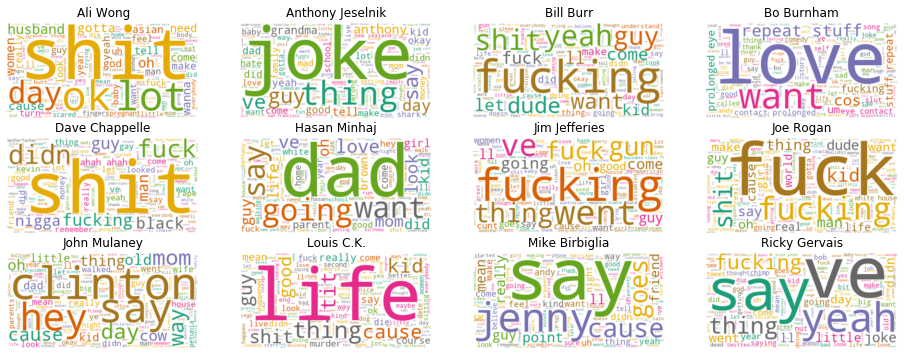

In [26]:
# reset the output dimensions.

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

fullNames = ['Ali Wong', 
             'Anthony Jeselnik', 
             'Bill Burr', 
             'Bo Burnham', 
             'Dave Chappelle', 
             'Hasan Minhaj', 
             'Jim Jefferies', 
             'Joe Rogan', 
             'John Mulaney', 
             'Louis C.K.', 
             'Mike Birbiglia', 
             'Ricky Gervais']

# creating subplots for each comedian.

for index, comedian in enumerate(df.columns):
    wc.generate(dataClean.Transcript[comedian])
    plt.subplot(3, 4, index + 1)
    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis('off')
    plt.title(fullNames[index])
    
plt.show()

In [27]:
# find a number of unique words each comedian uses.

# identifying non-zero items in the doc-term matrix, meaning 
# that the word is said at least once.

uniqueList = []

for comedian in df.columns:
    uniques = df[comedian].to_numpy().nonzero()[0].size
    uniqueList.append(uniques)
    
# create a new df with these unique words.

dataWords = pd.DataFrame(list(zip(fullNames, uniqueList)),
                         columns = ['comedian', 'unique_words'])
dataUniqueSort = dataWords.sort_values(by = 'unique_words')
dataUniqueSort

,comedian,unique_words
1,Anthony Jeselnik,956
9,Louis C.K.,1046
3,Bo Burnham,1246
6,Jim Jefferies,1273
0,Ali Wong,1319
8,John Mulaney,1353
4,Dave Chappelle,1360
7,Joe Rogan,1391
10,Mike Birbiglia,1454
5,Hasan Minhaj,1525


In [28]:
# calculating the words per minute each comedian say.

# total number of words every comedian say.

totalList = []
for comedian in df.columns:
    totals = sum(df[comedian])
    totalList.append(totals)
    
# comedy special run times from IMDB, in minutes.
runTimes = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]

# making feature engineering by adding some columns.

dataWords['total_words'] = totalList
dataWords['run_times'] = runTimes
dataWords['words_per_minute'] = (dataWords.total_words / dataWords.run_times)

# sorting the df by words per minute 
# to see who talks slowest and fastest.

dataWPMsort = dataWords.sort_values(by = 'words_per_minute')
dataWPMsort

,comedian,unique_words,total_words,run_times,words_per_minute
1,Anthony Jeselnik,956,2766,59,46.881356
3,Bo Burnham,1246,3048,60,50.800000
0,Ali Wong,1319,3098,60,51.633333
9,Louis C.K.,1046,3071,58,52.948276
6,Jim Jefferies,1273,4459,77,57.909091
10,Mike Birbiglia,1454,4429,76,58.276316
11,Ricky Gervais,1583,4627,79,58.569620
4,Dave Chappelle,1360,3925,67,58.582090
5,Hasan Minhaj,1525,4458,73,61.068493
8,John Mulaney,1353,3841,62,61.951613


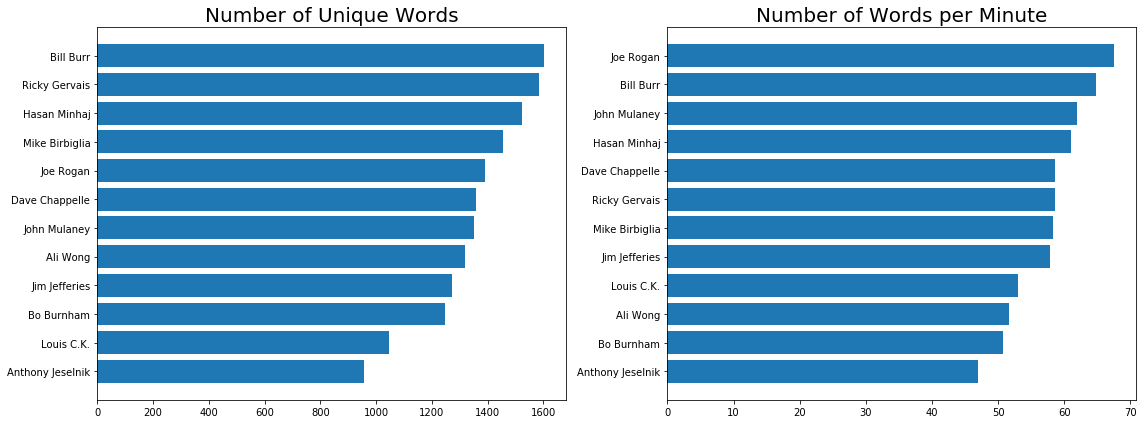

In [29]:
# ploting to visualize insigths and our data.

import numpy as np

yPos = np.arange(len(dataWords))

plt.subplot(1, 2, 1)
plt.barh(yPos, dataUniqueSort.unique_words, align = 'center')
plt.yticks(yPos, dataUniqueSort.comedian)
plt.title('Number of Unique Words', fontsize = 20)

plt.subplot(1, 2, 2)
plt.barh(yPos, dataWPMsort.words_per_minute, align = 'center')
plt.yticks(yPos, dataWPMsort.comedian)
plt.title('Number of Words per Minute', fontsize = 20)

plt.tight_layout()
plt.show()

### F vs S words

In [30]:
dataBadWords = df.transpose()[['fucking', 'fuck', 'shit']]
dataProf = pd.concat([dataBadWords.fucking + dataBadWords.fuck, dataBadWords.shit], axis = 1)
dataProf.columns = ['f_word', 's_word']
dataProf

,f_word,s_word
ali,16,34
anthony,15,9
bill,106,64
bo,37,7
dave,65,45
hasan,24,15
jim,116,20
joe,136,40
john,4,6
louis,21,25


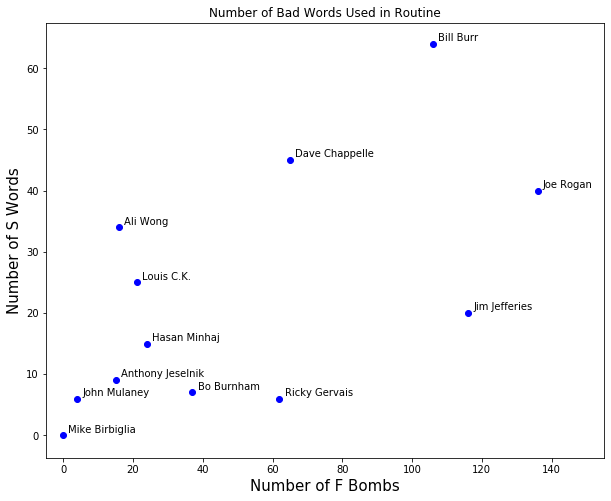

In [31]:
# plotting the amount of f words by comedian.

plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(dataProf.index):
    x = dataProf.f_word.loc[comedian]
    y = dataProf.s_word.loc[comedian]
    plt.scatter(x, y, color = 'blue')
    plt.text(x + 1.5,  y + 0.5, fullNames[i], fontsize = 10)
    plt.xlim(-5, 155)
    
plt.title('Number of Bad Words Used in Routine')
plt.xlabel('Number of F Bombs', fontsize = 15)
plt.ylabel('Number of S Words', fontsize = 15)

plt.show();

## Sentiment Analysis

In [32]:
data = pd.read_pickle('corpus.pkl')
data.head()

,Transcript
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s..."
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ..."
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."


In [33]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['Transcript'].apply(pol)
data['subjectivity'] = data['Transcript'].apply(sub)

data.head()

,Transcript,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ...",0.069359,0.482403
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s...",0.054285,0.559732
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ...",0.016479,0.537016
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...,0.074514,0.539368
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ...",-0.002690,0.513958


In [34]:
fullNames = ['Ali Wong', 
             'Anthony Jeselnik', 
             'Bill Burr', 
             'Bo Burnham', 
             'Dave Chappelle', 
             'Hasan Minhaj', 
             'Jim Jefferies', 
             'Joe Rogan', 
             'John Mulaney', 
             'Louis C.K.', 
             'Mike Birbiglia', 
             'Ricky Gervais']

data['full_name'] = fullNames

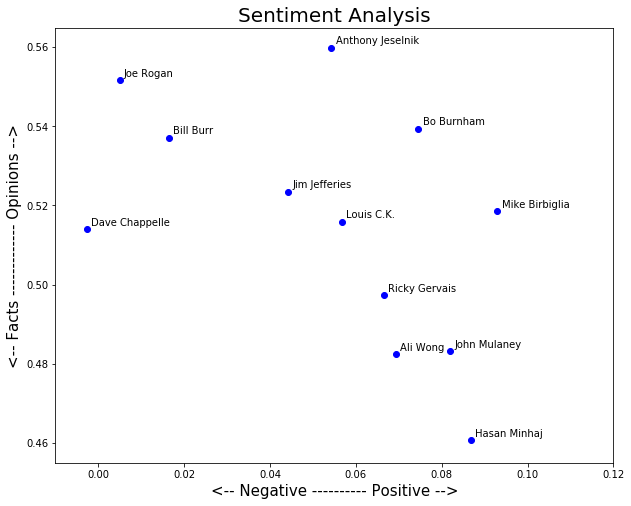

In [35]:
# ploting the results.

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x + .001, y + .001, data['full_name'][index], fontsize = 10)
    plt.xlim(-.01, .12)
    
plt.title('Sentiment Analysis', fontsize = 20)
plt.xlabel('<-- Negative ---------- Positive -->', fontsize = 15)
plt.ylabel('<-- Facts ------------- Opinions -->', fontsize = 15)

plt.show();


### Sentiment  of routine over time

In [36]:
# split the routine in 10 parts.

import numpy as np
import math

def splitText(text, n = 10):
    '''Takes in a string and split it in n equal parts.
    We are using 10 as n by default.'''
    
    # calculating length of text, size of aech chunk of text
    # and starting points of each chunk.
    
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # pull out equally sized pieces of text and append them to a list.
    
    splitList = []
    for piece in range(n):
        splitList.append(text[start[piece]:start[piece] + size])
    return splitList

In [37]:
# creating a list to host all the text pieces.

listPieces = []
for t in data.Transcript:
    split = splitText(t)
    listPieces.append(split)

In [38]:
len(listPieces)

12

In [42]:
len(listPieces[0])

10

In [43]:
# calculating the polarity of each piece of text.

polarityTranscript = []

for lp in listPieces:
    polarityPieces = []
    for p in lp:
        polarityPieces.append(TextBlob(p).sentiment.polarity)
    polarityTranscript.append(polarityPieces)

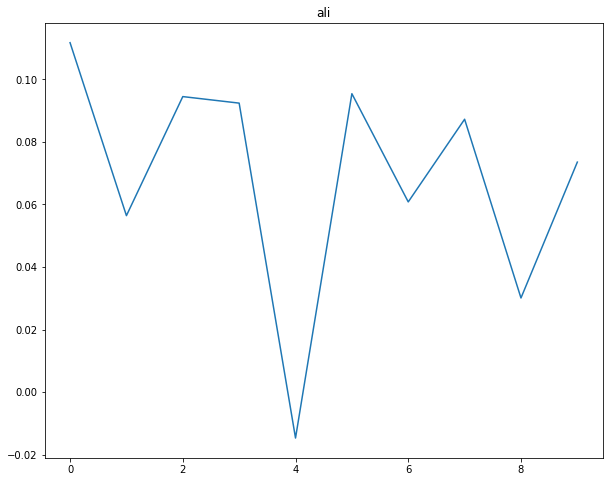

In [45]:
# plotting polarity for one comedian.

plt.plot(polarityTranscript[0])
plt.title(data['full_name'].index[0])
plt.show();

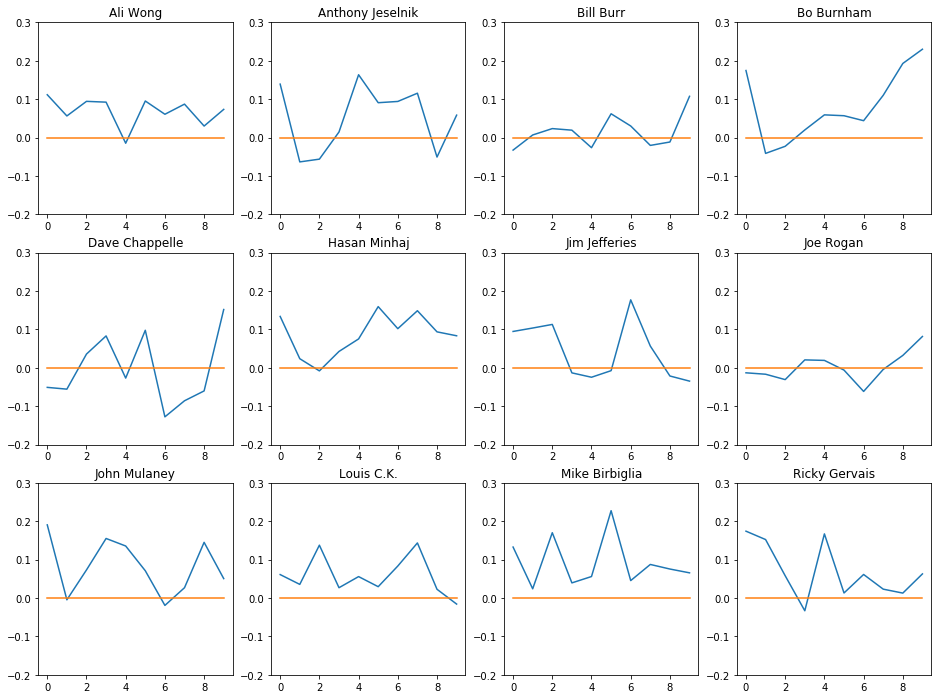

In [46]:
# plotting polarity for all comedians.

plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):
    plt.subplot(3, 4, index + 1)
    plt.plot(polarityTranscript[index])
    plt.plot(np.arange(0, 10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin = -.2, ymax = .3)
    
plt.show();